# Data Load

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_absolute_error

from time import time

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Mini_PJT_modelling/data_4/'

train = pd.read_csv(data_path + 'train_V2.csv')

test = pd.read_csv(data_path + 'test_V2.csv')

submission = pd.read_csv(data_path + 'sample_submission_V2.csv')

In [ ]:
! sudo apt install -y fonts-nanum*
! sudo fc-cache -fv
! rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-

In [ ]:
import matplotlib.font_manager

# matplotlib.font_manager._rebuild()
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith("Nanum")])

# 폰트 설정
plt.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

# Data 전처리

In [ ]:
# 불필요하다 판단되는 column 제거

train.drop(['Id', 'matchId'], axis=1, inplace=True)
train

,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,4d4b580de459be,0,0,0.00,0,0,0,60,1241,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,684d5656442f9e,0,0,91.47,0,0,0,57,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,6a4a42c3245a74,1,0,68.00,0,0,0,47,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,a930a9c79cd721,0,0,32.90,0,0,0,75,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,de04010b3458dd,0,0,100.00,0,0,0,45,0,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,d238e426f50de7,0,0,0.00,0,0,0,74,1029,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,408cdb5c46b2ac,0,1,44.15,0,0,0,69,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e26ac84bdf7cef,0,0,59.06,0,0,0,66,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,c2223f35411394,0,4,180.40,1,1,2,11,0,2,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
# 결측치 확인

train.isnull().sum()

groupId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
# 결측치 값 1개로 삭제

train.dropna(axis=0, inplace=True)
train.isnull().sum()

groupId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# EDA

-- Datafield	설명
- DBNOs(Down But Not Out) : 적을 기절시켰으나, 적 팀원에 의해 부활되어 실제로는 킬로 처리되지 않은 횟수
- assists : 아군이 킬했을 때 같이 데미지를 넣은 수 (말 그대로 어시스트)
- boosts : 부스트 아이템 사용 횟수
- damageDealt : 총 넣은 데미지 (단, 팀에 준 피해나 자해는 포함되지 않음)
- headshotKills : 헤드샷 킬 수
- heals : 힐링 아이템 사용 횟수
-- Id : 플레이어 ID ## 제거
- killPlace : 매치에서의 킬 횟수 순위
- killPoints : 킬 수로 산정한 ELO의 개념. 만약 rankPoints에 -1 이외의 값이 있다면, killPoints의 0값은 값이 없는 것으로 처리됨.
- killStreaks : 짧은 시간동안 최대한 많이 킬했을 때의 킬 수
- kills : 총 킬 수
- longestKill : 킬과 킬 사이의 이동한 가장 긴 거리
- matchDuration : 매치의 시간 (초 단위)
-- matchId : 매치 ID (트레이닝 데이터와 테스트 데이터에 동일한 매치 ID는 없음) ## 제거
- matchType : 매치 타입 “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; 나머지는 이벤트 또는 커스텀 매치
- rankPoints : 랭킹 ELO의 개념
- revives : 아군 부활 횟수
- rideDistance : 탈것으로 이동한 총 거리
- roadKills : 탈것으로 킬한 횟수
- swimDistance : 수영한 총 거리
- teamKills : 팀킬 횟수
- vehicleDestroys : 차량 폭파 횟수
- walkDistance : 걸어간 총 거리
- weaponsAcquired : 얻은 무기의 수
- winPoints : 승리 횟수로 판단한 ELO의 개념
- groupId : 매치 내 그룹 아이디, 동일 그룹 구성원들이 다른 게임을 할 때마다 새로운 그룹 아이디가 부여됨
- numGroups : 게임 내 총 그룹 수 (솔로 -> 듀오 -> 스쿼드로 갈 수록 줄어듦)
- maxPlace : 매치 내에서 최악의 등수
- winPlacePerc : 예측 목표, 1에 가까워질 수록 순위가 높아진다. (0부터 1까지의 값으로 나타냄. 1은 1등을, 0은 꼴등을 의미한다.)

In [ ]:
train.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007645,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555290,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,-0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555290,-0.469829,-0.386032,1.000000,-0.023278,-0.730499,-0.810517,...,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490144,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023278,1.000000,0.036192,0.037091,...,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730499,0.036192,1.000000,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810517,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


* 얻은 무기의 수와 연관이 있는지
* 데미지
* surviver 특성상 살아있어야 이길수 있기 때문에 제일 기초적인 기절 여부에 따라 이길확률이 연관 있는지
* 게임이 진행될 수록 구역이 좁아들기 때문에, 이동 과 연관이 있는지
* 부스트/힐링 아이템 사용여부와 연관이 있는지

## 얻은 무기의 수와 생존(승률)과 연관이 있는지 알아보자

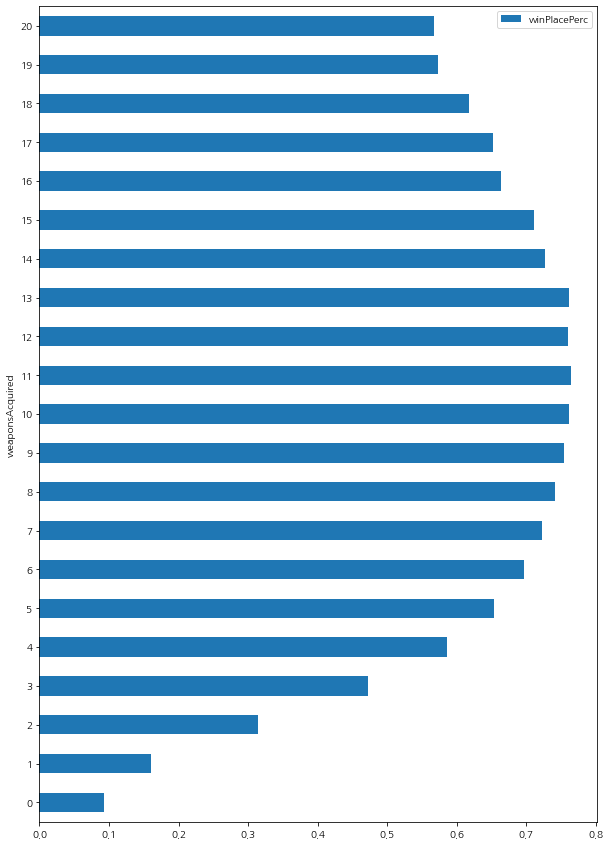

In [ ]:
# 15개 이하의 데이터 취합, target(생존/승률) 평균치
wl = train[train.weaponsAcquired <= 20]
how = {
    "winPlacePerc" : np.mean
}
wl = wl.groupby('weaponsAcquired').agg( how )
# wl
fig = plt.figure(figsize=(10 ,15))
graph1 = fig.add_subplot(1,1,1)


wl.plot.barh(ax=graph1)


- 무기를 일정 기준치(약 4 ~ 18) 얻을 경우 승률이 올라가는걸 확인할 수 있다
- 승률이 올라간 기준치에서 추가적으로 데미지도 많이 줬는지 알아보자

In [ ]:
from pandas.core.groupby import groupby
# train[train.weaponsAcquired <= 15].damageDealt.value_counts()
b = train[(train.weaponsAcquired <= 20) & (train.weaponsAcquired >= 5)]
weapons_dmg = b[['damageDealt', 'winPlacePerc']].groupby(b['weaponsAcquired']).mean()
weapons_dmg

,damageDealt,winPlacePerc
weaponsAcquired,,
5,176.102524,0.653519
6,193.109397,0.696562
7,204.981877,0.723188
8,212.475242,0.741634
9,217.752652,0.754816
10,219.083692,0.761477
11,217.721661,0.764164
12,226.927748,0.759424
13,234.564495,0.761287


- 일정 기준치 안에서 16개 이상일때부터 총 넣은 데미지가 급격하게 늘어났으나, 승률은 그전(15개 이하)이 더 좋은걸 확인할 수 있다.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


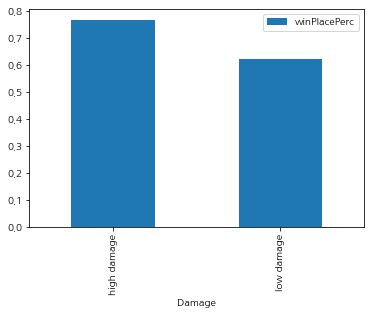

In [ ]:
b.damageDealt.describe() # 중앙값 132
b[b.damageDealt <= 132]

def func(x):
    if x <= 132:
        return "low damage"
    else:
        return "high damage"

b['Damage'] = b['damageDealt'].map(func)

how = {
    "winPlacePerc" : np.mean
}
t = b.groupby('Damage').agg( how )
t.plot.bar()

- 그렇지만 무기 습득 개수와 별개로 high damage가 상대적으로 target과 연관이 있다는걸 확인할 수 있다

## 기절/킬 과 연관이 있는지 알아보자


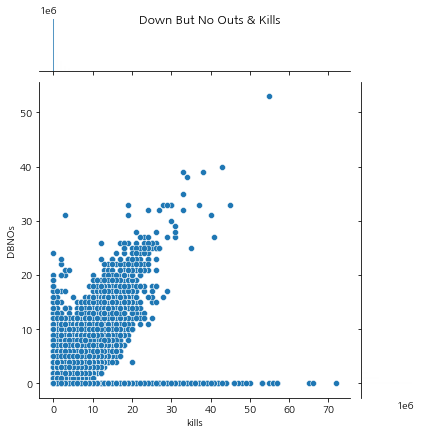

In [ ]:
# kills 과 DBNOs는 연관이 높아 보인다
np.random.seed(0)
sns.jointplot(x="kills", y="DBNOs", data=train)
plt.suptitle("Down But No Outs & Kills")
plt.show()

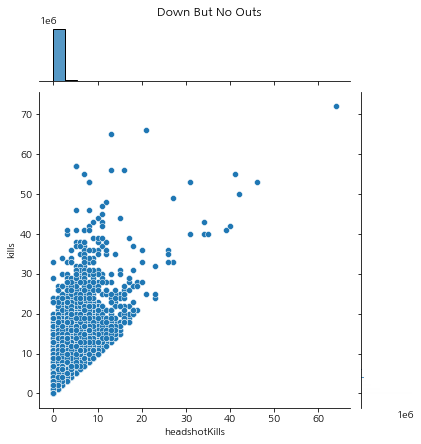

In [ ]:
# headshotKills와 Kills값도 연관있어 보인다
train.DBNOs.unique()
train.DBNOs.value_counts()

np.random.seed(0)
sns.jointplot(x="headshotKills", y="kills", data=train)
plt.suptitle("Down But No Outs", y=1.02)
plt.show()

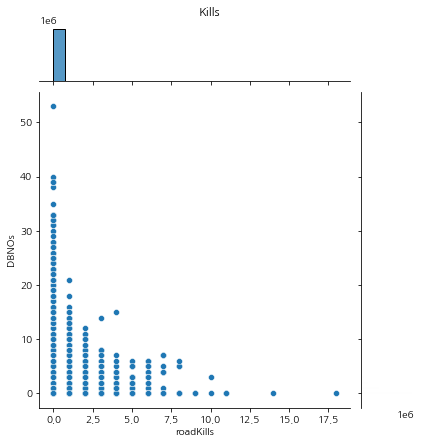

In [ ]:
# roadkills과 DBNOs값은 연관관계가 딱히 좋아 보이진 않는다22
np.random.seed(0)
sns.jointplot(x="roadKills", y="DBNOs", data=train)
plt.suptitle("Kills", y=1.02)
plt.show()

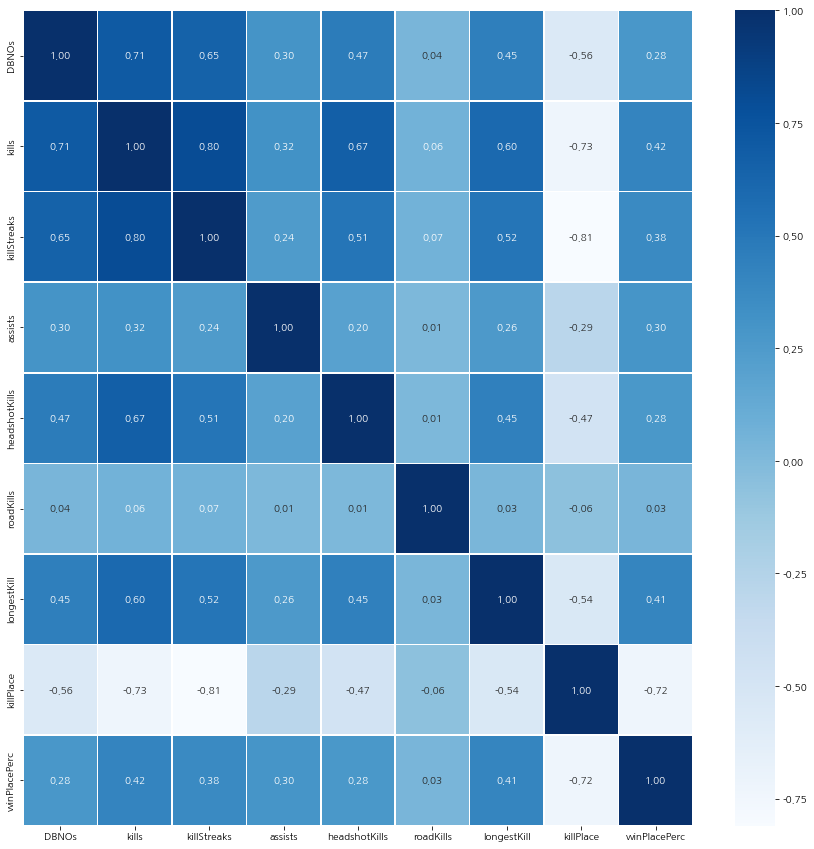

In [ ]:
k = train[['DBNOs', 'kills', 'killStreaks', 'assists', 'headshotKills', 'roadKills', 'longestKill', 'killPlace', 'winPlacePerc']]
plt.figure(figsize=(15,15))
sns.heatmap(data = k.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- 상관관계가 전체적으로 낮지만, 그중 kill이 높은편에 속한다고 추론해볼 수 있다
- longestKill의 경우 어떠한 관계를 보여주는지 확인해 보자

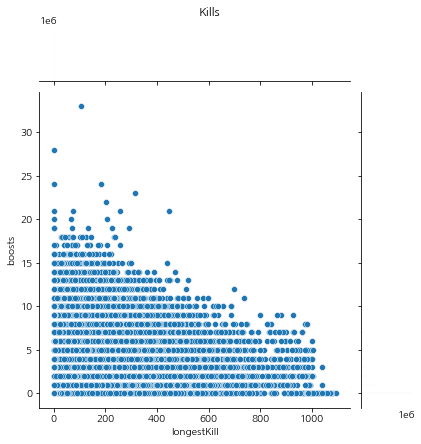

In [ ]:
# 거리의 영향은 받으나, 전반적으로 boosts를 하는걸로 보인다
np.random.seed(0)
sns.jointplot(x="longestKill", y="boosts", data=train)
plt.suptitle("Kills", y=1.02)
plt.show()

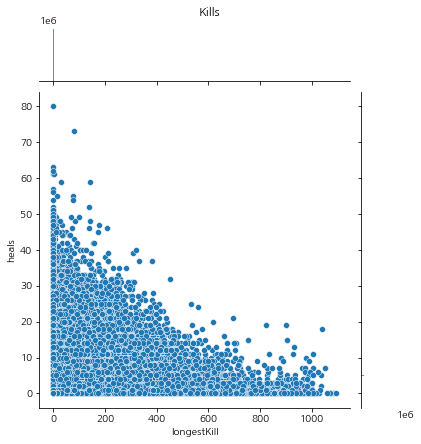

In [ ]:
# 하지만, heals의 경우에는 거리의 영향이 상대적으로 큰것으로 보인다
np.random.seed(0)
sns.jointplot(x="longestKill", y="heals", data=train)
plt.suptitle("Kills", y=1.02)
plt.show()

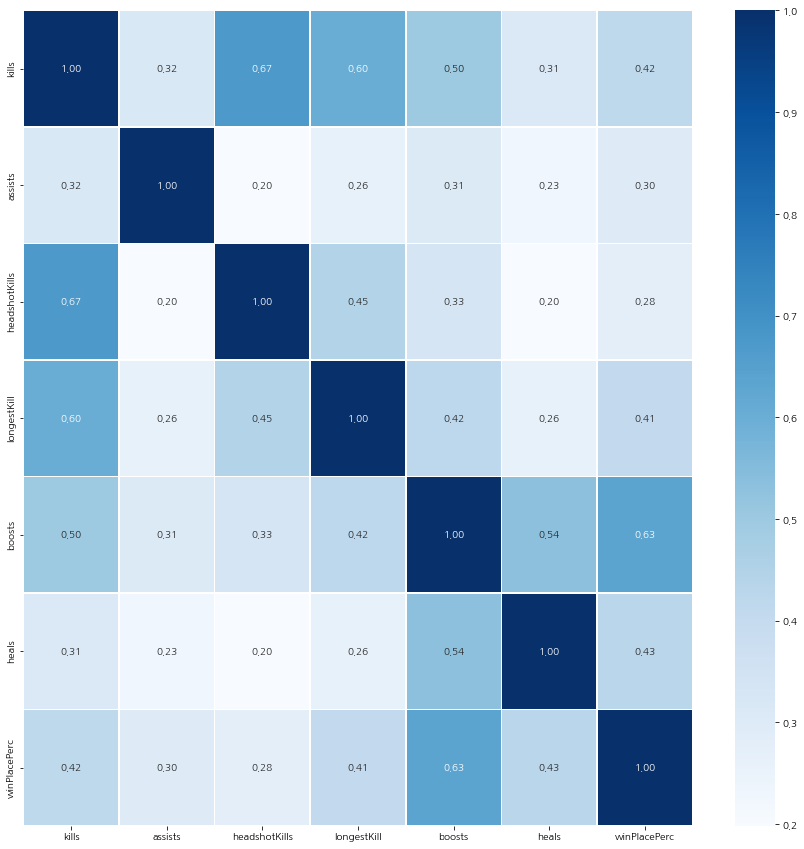

In [ ]:
k = train[['kills', 'assists', 'headshotKills', 'longestKill', 'boosts', 'heals', 'winPlacePerc']]
plt.figure(figsize=(15,15))
sns.heatmap(data = k.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- kill 은 매우 연관되어 있어 보이며, 예상외로 assists는 상대적으로 적은걸로 확인된다

또한, 우리가 찾아야 할 target 값이 kill보다 boosts가 상관관계가 높은걸 확인할 수 있다
- 그렇다면 다음은 생존과 관계여부에 대해서 확인해 보자

## 게임 특성상 진행될 수록 구역이 좁아들기 때문에, 이동 과 연관이 있는지 알아보자

In [ ]:
# 이동수단중 탈것(ride), 수영(swim), 걷기(walk) 와 target값 관계 찾기
train[['rideDistance', 'swimDistance', 'walkDistance', 'winPlacePerc']].mean()
'''
rideDistance     606.115805
swimDistance       4.509323
walkDistance    1154.218119
winPlacePerc       0.472822
'''

train[['rideDistance', 'swimDistance', 'walkDistance', 'winPlacePerc']].describe() // 1

,rideDistance,swimDistance,walkDistance,winPlacePerc
count,4446965.0,4446965.0,4446965.0,4446965.0
mean,606.0,4.0,1154.0,0.0
std,1498.0,30.0,1183.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,155.0,0.0
50%,0.0,0.0,685.0,0.0
75%,0.0,0.0,1976.0,0.0
max,40710.0,3823.0,25780.0,1.0


In [ ]:
e = train[['rideDistance', 'swimDistance', 'walkDistance', 'winPlacePerc']]
e.corr()

,rideDistance,swimDistance,walkDistance,winPlacePerc
rideDistance,1.000000,0.049448,0.310936,0.342915
swimDistance,0.049448,1.000000,0.167509,0.149607
walkDistance,0.310936,0.167509,1.000000,0.810888
winPlacePerc,0.342915,0.149607,0.810888,1.000000


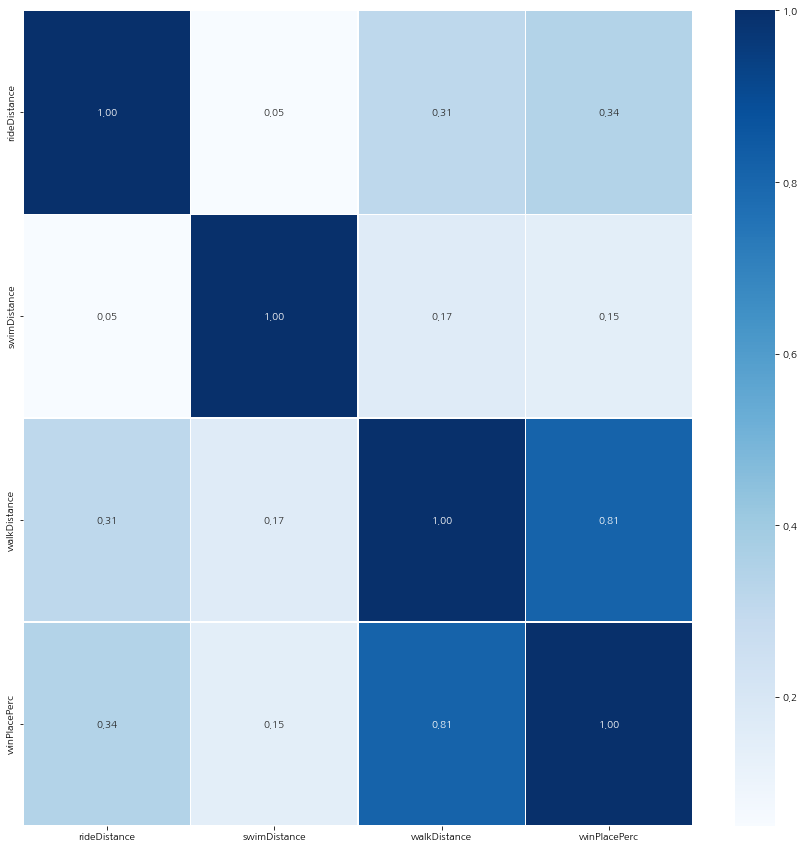

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = e.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- 이동수단 3총사 중에서 걸어가는게 제일(매우) 관계가 높은것으로 보아 다른 이동수단 보다는 걸어가는것이 생존에 더 용이하다고 추론할 수 있다

다음으로 안전하다고 볼수 있는건 탈것을 통해서 이동할때, 그다음 상대적으로 제일 위험하다고 볼수 있는 '수영' 순이다

## 마지막으로 이전 heatmap에서 확인되었던 부스트/힐링 즉, 생존 아이템과 연관이 얼마나 있는지 알아보자

In [ ]:
train.boosts.value_counts()
'''
0     2521323
1      680252
2      491316
3      295883
4      195729
5      120271
6       70111
7       37626
8       18893
9        8638
10       3992
11       1644
12        726
13        295
14        126
15         62
16         30
17         16
18         13
19          6
21          4
20          3
24          2
33          1
28          1
23          1
22          1
'''
help = train[['heals', 'winPlacePerc']].groupby(train['boosts']).mean()
help

,heals,winPlacePerc
boosts,,
0,0.259775,0.301320
1,1.685966,0.561017
2,2.465865,0.682152
3,3.381549,0.776169
4,3.996705,0.831251
5,4.541253,0.867935
6,4.990187,0.894765
7,5.348217,0.915358
8,5.652040,0.928498


- 1개 이상부터 반 이상의 관계를 보여주며 급격히 높아지는걸 확인 할 수 있다.

따라서, boosts아이템과는 관계가 아주 높다고 보여진다.

다만, 밑에서 세번째 row의 경우 주변과 다르게 매우 낮은수치인것을 확인할 수 있다

In [ ]:
train[train.boosts == 24]

,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1465177,922edc8b32c161,0,24,746.3,0,4,1,2,1415,7,...,0,2175.0,0,0.0,0,0,3650.0,4,1562,0.9663
3979434,ba50388b7256f1,0,24,0.0,0,0,1,4,0,0,...,0,0.0,0,0.0,0,0,267.3,8,0,0.0000


- 아주 높은구간에서 특이하게 반 이하로 떨어진 승률을 확인해 보니, 2개중 1개는 높지만 한개가 0으로 평균값때문에 떨어진걸로 확인된다. 

추가적으로 첫번째 row는 왜이렇게 낮은지 확인해 보자

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


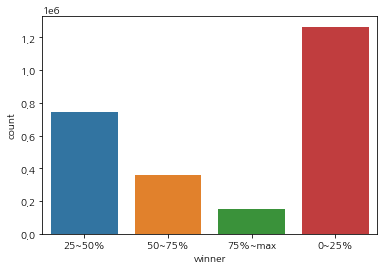

In [ ]:
boo = train[train.boosts == 0]
# boo # 2521323
boo[['boosts', 'winPlacePerc']].winPlacePerc.describe() /10
'''
count    252132.300000
mean          0.030132
std           0.024268
min           0.000000
25%           0.010420
50%           0.025000
75%           0.045650
max           0.100000
'''


def func(x):
    if x <= 0.25:
        return '0~25%'
    elif x <= 0.5:
        return '25~50%'
    elif x <= 0.75:
        return '50~75%'
    else:
        return '75%~max'

boo['winner'] = boo['winPlacePerc'].map(func)

boo1 = boo.winner.value_counts() #.plot.bar()

sns.countplot('winner', data=boo)

- 위에서도 확인했듯이 매우 높은 분포와 분포내에서 낮은 승률을 보여지고 있는것으로 확인된다

-- 따라서 지금까지 확인되는것으로는 walkDistance와 boosts가 가장 관계가 높았으며, 그 이후로는 kill로 확인된다


## 추가적으로 관계가 없는것도 확인해보자

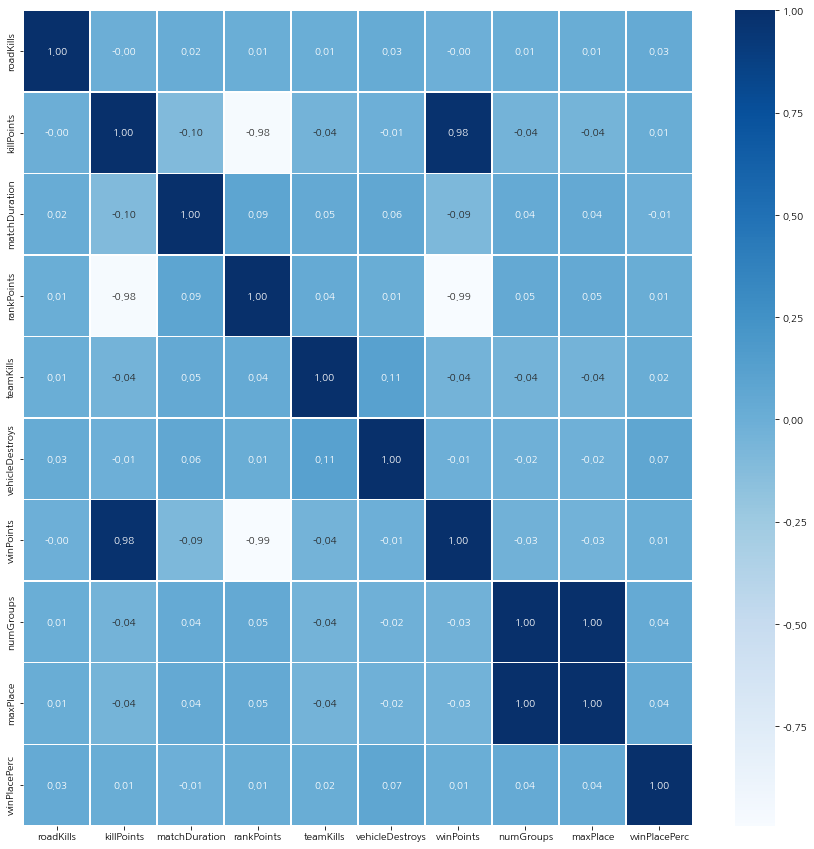

In [ ]:
k = train[['roadKills', 'killPoints', 'matchDuration', 'matchType', 'rankPoints', 'teamKills', 'vehicleDestroys', 'winPoints', 'numGroups', 'maxPlace', 'winPlacePerc']]
plt.figure(figsize=(15,15))
sns.heatmap(data = k.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# test

In [ ]:
! pip install Imputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement Imputer (from versions: none)
ERROR: No matching distribution found for Imputer


In [ ]:
df = train
df.drop(['groupId'], axis=1, inplace=True)
df.isnull().sum()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean', axis=1)
# df_mu = pd.DataFrame(fill_NaN.fit_transform(df))
df.columns = df.columns
df.index = df.index
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        object 
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(19), object(1)
memory

In [ ]:
# Creating cat codes of match type

df['matchType'] = df['matchType'].astype('category')
df['matchType'] = df['matchType'].cat.codes

In [ ]:
df.matchType

0          15
1          15
2           2
3          15
4          13
           ..
4446961    15
4446962    12
4446963    15
4446964    15
4446965    13
Name: matchType, Length: 4446965, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split

y = df['winPlacePerc']
X = df.drop(['winPlacePerc'], axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1511)

In [ ]:
import gc
gc.collect()

55

In [ ]:
# 학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression   # 1. Linear Regression
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM

from sklearn.metrics import mean_squared_error

In [ ]:
## training
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(train_X, train_y)
reg2.fit(train_X, train_y)
reg3.fit(train_X, train_y)
reg4.fit(train_X, train_y)
reg5.fit(train_X, train_y)

pred_train = reg.predict(train_X)
pred_train2 = reg2.predict(train_X)
pred_train3 = reg3.predict(train_X)
pred_train4 = reg4.predict(train_X)
pred_train5 = reg5.predict(train_X)
pred_val = reg.predict(val_X)
pred_val2 = reg2.predict(val_X)
pred_val3 = reg3.predict(val_X)
pred_val4 = reg4.predict(val_X)
pred_val5 = reg5.predict(val_X)

mse_train = mean_squared_error(train_y, pred_train)
mse_val = mean_squared_error(val_y, pred_val)
mse_train2 = mean_squared_error(train_y, pred_train2)
mse_val2 = mean_squared_error(val_y, pred_val2)
mse_train3 = mean_squared_error(train_y, pred_train3)
mse_val3 = mean_squared_error(val_y, pred_val3)
mse_train4 = mean_squared_error(train_y, pred_train4)
mse_val4 = mean_squared_error(val_y, pred_val4)
mse_train5 = mean_squared_error(train_y, pred_train5)
mse_val5 = mean_squared_error(val_y, pred_val5)


print("1. Linear Regression\t, train=%.4f, val=%.4f" % (mse_train, mse_val))
print("2. Lasso\t\t, train=%.4f, val=%.4f" % (mse_train2, mse_val2))
print("3. Ridge\t\t, train=%.4f, val=%.4f" % (mse_train3, mse_val3))
print("4. XGBoost\t\t, train=%.4f, val=%.4f" % (mse_train4, mse_val4))
print("5. LightGBM\t\t, train=%.4f, val=%.4f" % (mse_train5, mse_val5))

[02:11:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1. Linear Regression	, train=0.0159, val=0.0159
2. Lasso		, train=0.0241, val=0.0243
3. Ridge		, train=0.0159, val=0.0159
4. XGBoost		, train=0.0095, val=0.0095
5. LightGBM		, train=0.0069, val=0.0069


In [ ]:
## test data
tst = test
tst.drop(['Id', 'groupId', 'matchId'], axis=1, inplace=True)

tst['matchType'] = tst['matchType'].astype('category')
tst['matchType'] = tst['matchType'].cat.codes

tst

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,51.46,0,0,0,73,0,0,0,...,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,0,4,179.10,0,0,2,11,0,2,1,...,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,1,0,23.40,0,0,4,49,0,0,0,...,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,0,0,65.52,0,0,0,54,0,0,0,...,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,0,4,330.20,1,2,1,7,0,3,1,...,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,1,2,381.00,3,0,7,4,1294,4,2,...,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,0,0,0.00,0,0,0,64,1449,0,0,...,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,0,0,91.96,0,0,3,24,0,1,1,...,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,1,2,138.60,0,0,12,25,0,1,1,...,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [ ]:
submission

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [ ]:

pred_tst = reg5.predict(tst)
tst['winPlacePerc'] = pred_tst
submission = tst[['Id', 'winPlacePerc']]
submission.to_csv('output.csv', index=False)

In [31]:
submission

,winPlacePerc
0,0.254536
1,0.943017
2,0.629802
3,0.551433
4,0.926267
...,...
1934169,0.729276
1934170,0.427908
1934171,0.890689
1934172,0.823952


# feature engineering

- 이상치를 제거


# a

-- Datafield 설명

* assists : 아군이 킬했을 때 같이 데미지를 넣은 수 (말 그대로 어시스트)
* headshotKills : 헤드샷 킬 수

    * Id : 플레이어 ID ## 제거
* killPlace : 매치에서의 킬 횟수 순위
* killPoints : 킬 수로 산정한 ELO의 개념. 만약 rankPoints에 -1 이외의 값이 있다면, killPoints의 0값은 값이 없는 것으로 처리됨.
* killStreaks : 짧은 시간동안 최대한 많이 킬했을 때의 킬 수
* longestKill : 킬과 킬 사이의 이동한 가장 긴 거리
* matchDuration : 매치의 시간 (초 단위)
    * matchId : 매치 ID (트레이닝 데이터와 테스트 데이터에 동일한 매치 ID는 없음) ## 제거
* matchType : 매치 타입 “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; 나머지는 이벤트 또는 커스텀 매치
* rankPoints : 랭킹 ELO의 개념
* revives : 아군 부활 횟수

* roadKills : 탈것으로 킬한 횟수

* teamKills : 팀킬 횟수
* vehicleDestroys : 차량 폭파 횟수


* winPoints : 승리 횟수로 판단한 ELO의 개념
* groupId : 매치 내 그룹 아이디, 동일 그룹 구성원들이 다른 게임을 할 때마다 새로운 그룹 아이디가 부여됨
* numGroups : 게임 내 총 그룹 수 (솔로 -> 듀오 -> 스쿼드로 갈 수록 줄어듦)
* maxPlace : 매치 내에서 최악의 등수
* winPlacePerc : 예측 목표, 1에 가까워질 수록 순위가 높아진다. (0부터 1까지의 값으로 나타냄. 1은 1등을, 0은 꼴등을 의미한다.)


In [ ]:
train.loc[3702]

In [ ]:
train[train.winPlacePerc == 1].matchType.value_counts().plot.barh()

In [ ]:
noweapons = train[(train.winPlacePerc == 1) & (train.matchType != 'squad-fpp')] # & (train.weaponsAcquired <= 1)]
noweapons[noweapons.matchType == 'solo'].groupId.value_counts()

In [ ]:
noweapons[noweapons.groupId == '965f34293ca8ab'].matchType.value_counts()

In [ ]:
train.walkDistance.value_counts()

In [ ]:
winer = train[train.winPlacePerc == 1]
winer.swimDistance.value_counts()
winer.swimDistance.value_counts().plot.hist()

In [ ]:
train.boosts.unique()

In [ ]:
alive = train[['boosts', 'heals', 'revives']]
alive.corr()

In [ ]:
creft = train[['DBNOs', 'assists', 'damageDealt', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks', 'kills', 'longestKill', 'roadKills']]
creft.corr()

In [ ]:
df = train[['boosts', 'heals', 'revives', 'roadKills', 'winPlacePerc']]
df.corr()

In [ ]:
train.roadKills.value_counts()
cond = train.roadKills >= 10
train[cond].loc[:, 'roadKills']

In [ ]:
train[['longestKill', 'damageDealt']].corr() #.value_counts()

In [ ]:
train.matchType.value_counts()